In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib as mpl

**Import data (Make sure to parse dates. Consider setting index column to 'date'.)**

In [44]:
df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    parse_dates=['date'],
    index_col='date'
    )
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


**Clean data**

Limpia los datos filtrando los días en que las vistas de la página se encuentren en un alto de 2.5% del conjunto de datos o inferior de 2.5% del conjunto de datos.

In [45]:
df_clean = df.loc[ (df['value'] >= df['value'].quantile(0.025)) &
            (df['value'] <= df['value'].quantile(0.975))]
df_clean

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


**Draw line plot**


Matplotlib para dibujar un gráfico de línea similar a "examples/Figure_1.png". El título debería ser Daily freeCodeCamp Forum Page Views 5/2016-12/2019. La etiqueta en el eje x debería ser Date y la etiqueta en el eje y debería ser Page Views

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')]

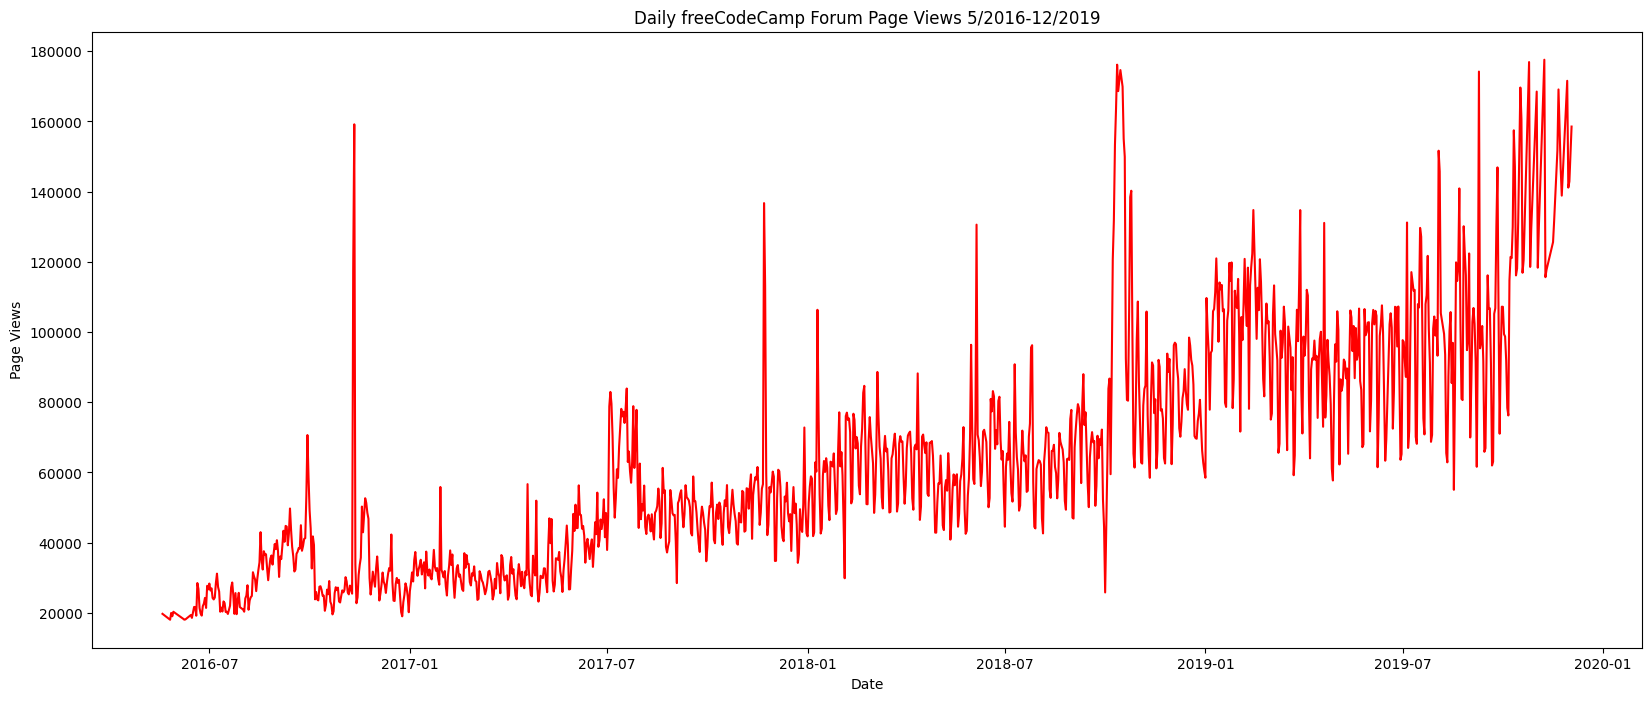

In [46]:
fig , ax = plt.subplots(figsize=(20, 8))
ax.plot(df_clean, c = 'red')
ax.set(xlabel='Date',ylabel='Page Views',title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


**Draw line plot**

Debería mostrar el promedio diario de vistas a la página para cada mes agrupadas por año. La leyenda debería mostrar etiquetas mensuales y tener un título de Months. En la gráfica, la etiqueta en el eje x debería ser Years y la etiqueta en el eje y debería ser Average Page Views

Text(0, 0.5, 'Average Page Views')

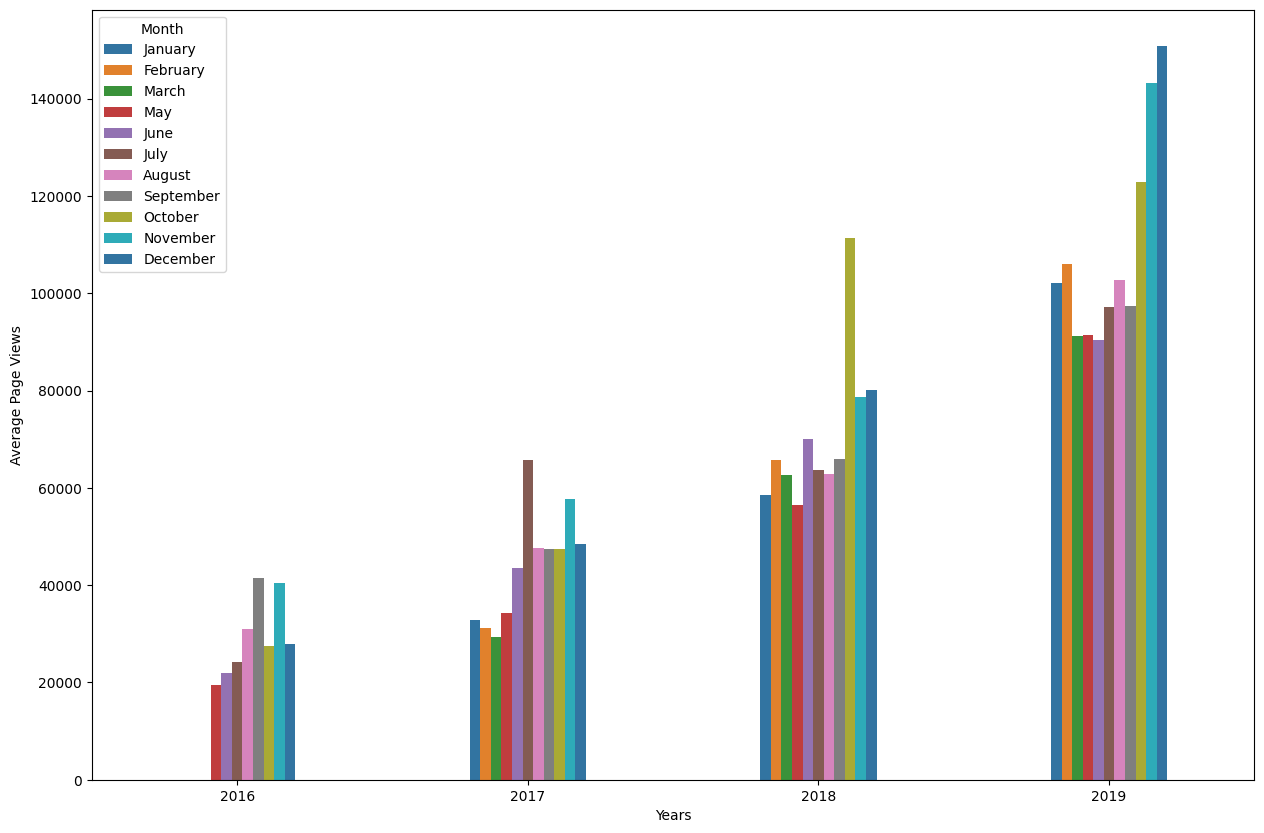

In [108]:
df_bar = df_clean.copy()

df_bar['Year'] = df_bar.index.year

df_bar['Month'] = df_bar.index.month_name()

df_bar_group= pd.DataFrame(df_bar.groupby(['Year','Month'])['value'].mean().round(1))

df_bar_group=df_bar_group.reset_index()

legend_order=['January','February','March','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df_bar_group, x="Year", y="value", hue="Month", palette="tab10", ax = ax, hue_order=legend_order,width=0.4)
sns.move_legend(ax,'upper left')

ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')



**draw_box_plot**

use Seaborn para dibujar dos puntos de caja adyacentes similar a "examples/Figure_3.png". Estos diagramas de caja deberían mostrar como los valores son distribuídos dentro de un año dado o mes y como se compara con el tiempo. El título del primer gráfico debería ser Year-wise Box Plot (Trend) y el título del segundo gráfico debería ser Month-wise Box Plot (Seasonality). Asegurese que la etiqueta mes mes en la parte inferior empiece en Jan y los ejes x y y estén etiquetados correctamente. La plantilla incluye comandos para preparar los datos.

In [48]:
df_box = df_clean.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


**Draw box plots (using Seaborn)**

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

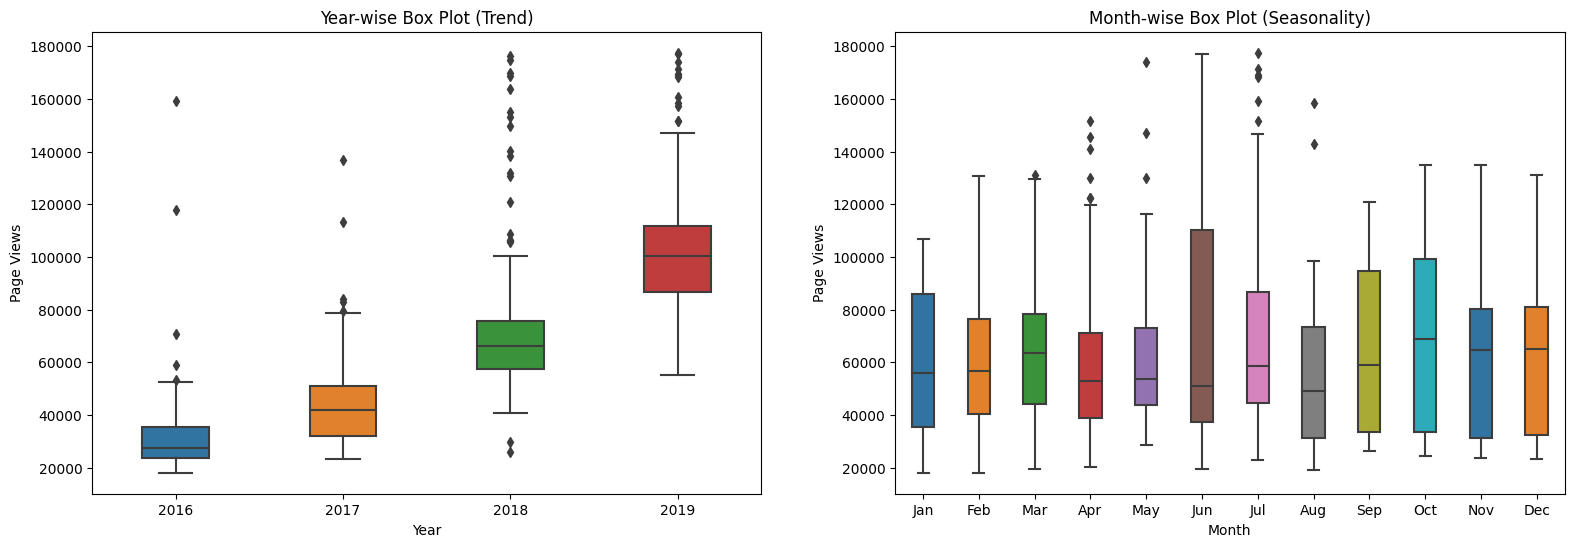

In [63]:
fig, axs= plt.subplots(1,2 , figsize=(19,6))

month_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.boxplot(df_box, x='year', y='value',palette="tab10", ax = axs[0], width=0.4)
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[0].set_ylabel('Page Views')
axs[0].set_xlabel('Year')
sns.boxplot(df_box, x='month', y='value',palette="tab10", ax = axs[1],width=0.4)
axs[1].set_title('Month-wise Box Plot (Seasonality)')
axs[1].set_ylabel('Page Views')
axs[1].set_xlabel('Month')
axs[1].set_xticklabels(month_order)
